In [13]:
import tensorflow as tf
import keras

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input ,Dense , Conv2D , Flatten , Dropout , GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [15]:
# load the data
cifar10 = tf.keras.datasets.cifar10

In [16]:
# Spltting of data
(x_train , y_train ) , (x_test, y_test) = cifar10.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test.shape

(10000, 32, 32, 3)

In [19]:
x_train[0].shape

(32, 32, 3)

In [20]:
# Flattening the dataset
y_train , y_test = y_train.flatten() , y_test.flatten()

In [21]:
y_train.shape

(50000,)

In [22]:
y_test.shape

(10000,)

In [23]:
# To find the number of classes
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
K = len(set(y_train))
print('the number of classes' , K)

the number of classes 10


In [27]:
 #Building the model using the Funcional API

i = Input(shape = x_train[0].shape)
x = Conv2D(32 , (3,3) , strides=2 , activation='relu')(i)
x = Conv2D(64 , (3,3) , strides=2 , activation='relu')(x)
x = Conv2D(128 , (3,3) , strides=2 , activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.45)(x)
# Dense layer NN 
x = Dense(1024 , activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K , activation='softmax')(x)

model = Model(i , x)

In [28]:
# compile nad fit the model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              )
r = model.fit(x_train , y_train , validation_data=(x_test , y_test),
              epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5558 - accuracy: 0.4305 - val_loss: 1.2619 - val_accuracy: 0.5548
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2471 - accuracy: 0.5516 - val_loss: 1.1367 - val_accuracy: 0.5987
Epoch 3/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1148 - accuracy: 0.6023 - val_loss: 1.0574 - val_accuracy: 0.6298
Epoch 4/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0237 - accuracy: 0.6355 - val_loss: 0.9412 - val_accuracy: 0.6644
Epoch 5/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9524 - accuracy: 0.6597 - val_loss: 0.9204 - val_accuracy: 0.6781
Epoch 6/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8884 - accuracy: 0.6852 - val_loss: 0.9284 - val_accuracy: 0.6776
Epoch 7/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8325 - accuracy: 0.7044 - val_loss: 0.8631 -

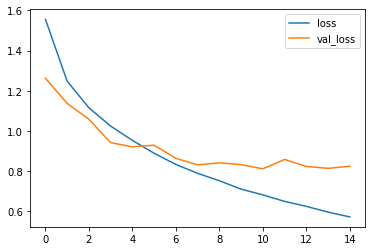

In [29]:
# plot the loss per iteration
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'val_loss')
plt.legend()

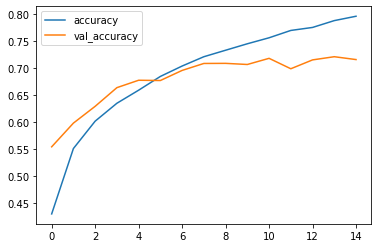

In [30]:
# plot the accuracy per iteration

plt.plot(r.history['accuracy'] , label = 'accuracy')
plt.plot(r.history['val_accuracy'] , label = 'val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[746  24  47  13  10   8   7  19  88  38]
 [  9 839   7  14   2   5   9   0  26  89]
 [ 64  10 607  75  71  69  60  20  13  11]
 [ 23  10  62 547  48 200  59  29   7  15]
 [ 19   2  72  89 631  68  45  64   7   3]
 [ 19   5  41 195  33 633  20  42   7   5]
 [  7   6  33  70  41  36 788  10   6   3]
 [  6   3  35  44  45  79   6 760   1  21]
 [ 31  36  23  20   4   8   5   8 838  27]
 [ 20 105   9  14   5   8   9  26  29 775]]


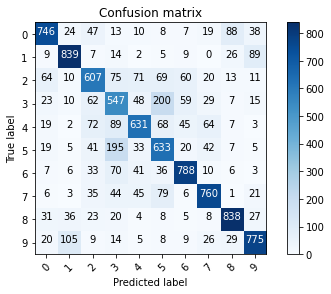

In [31]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [34]:
#label Mapping

labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck''' .split()

labelss

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

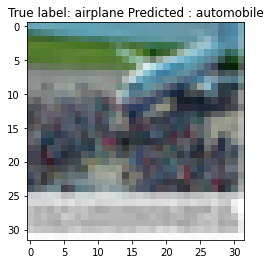

In [35]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));

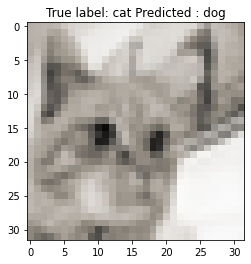

In [36]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));

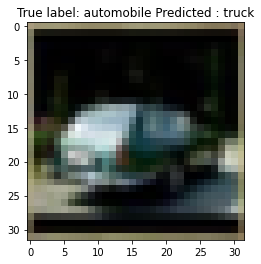

In [37]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));


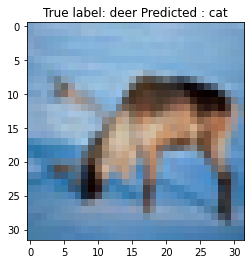

In [39]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));

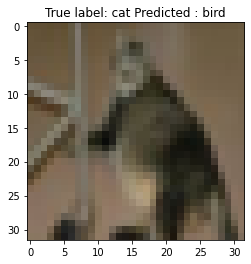

In [40]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));

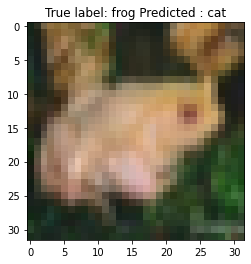

In [41]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));

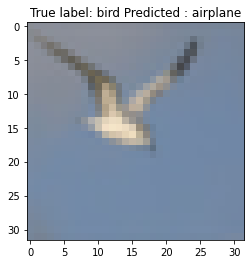

In [42]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));

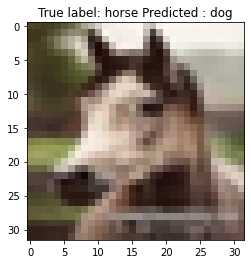

In [43]:
# Let us show the misclassified 

misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' %(labels[y_test[i]] , labels[p_test[i]]));